In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'malgun gothic'
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
# np.random.seed(1234)

# 데이터셋 읽기

In [4]:
# 데이터파일 읽기
data = pd.read_csv('data/cs-training.csv')
data.shape

(150000, 12)

In [5]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
# 첫 컬럼의 index 항목 제거
data.drop(columns=data.columns[0], inplace=True)

In [7]:
data.head(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


- 제공되는 데이터셋의 컬럼명이 이해하기 어렵거나 사용하기 어렵다면 변경하도록 한다.
    - 컬럼명을 소문자로 변경함.

In [8]:
data.columns = [col.lower() for col in data.columns]
data.head(2)

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


# EDA

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   seriousdlqin2yrs                      150000 non-null  int64  
 1   revolvingutilizationofunsecuredlines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   numberoftime30-59dayspastduenotworse  150000 non-null  int64  
 4   debtratio                             150000 non-null  float64
 5   monthlyincome                         120269 non-null  float64
 6   numberofopencreditlinesandloans       150000 non-null  int64  
 7   numberoftimes90dayslate               150000 non-null  int64  
 8   numberrealestateloansorlines          150000 non-null  int64  
 9   numberoftime60-89dayspastduenotworse  150000 non-null  int64  
 10  numberofdependents                    146076 non-null  float64
dtype

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
seriousdlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
revolvingutilizationofunsecuredlines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
numberoftime30-59dayspastduenotworse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
debtratio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
monthlyincome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
numberofopencreditlinesandloans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
numberoftimes90dayslate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
numberrealestateloansorlines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
numberoftime60-89dayspastduenotworse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [11]:
# 타겟(seriousdlqin2yrs) 분포 확인
data['seriousdlqin2yrs'].value_counts()

0    139974
1     10026
Name: seriousdlqin2yrs, dtype: int64

In [12]:
# 비율로 보기
data['seriousdlqin2yrs'].value_counts()/len(data['seriousdlqin2yrs'])

0    0.93316
1    0.06684
Name: seriousdlqin2yrs, dtype: float64

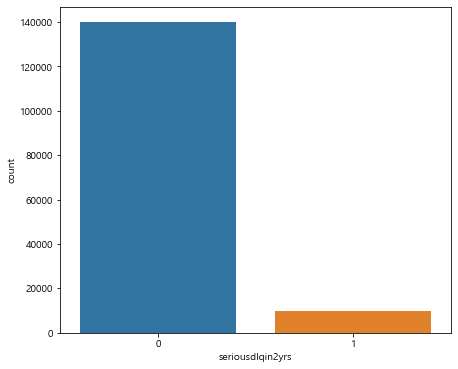

In [13]:
plt.figure(figsize=(7,6))
sns.countplot(x='seriousdlqin2yrs', data=data)
plt.show()

# 결측치 처리

## 결측치 확인

In [14]:
data.isna().sum() # True의 개수
# data.isna().mean() # True의 비율

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime30-59dayspastduenotworse        0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime60-89dayspastduenotworse        0
numberofdependents                       3924
dtype: int64

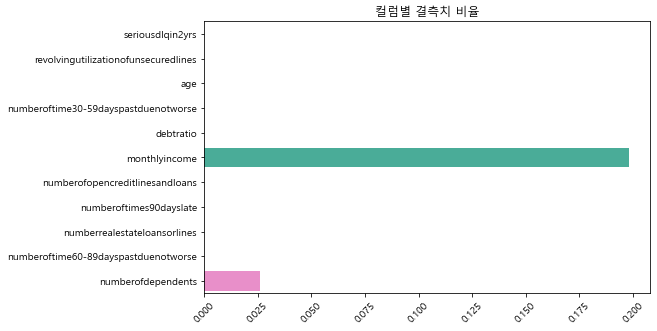

In [15]:
y = data.isna().mean()
plt.figure(figsize=(8,5))
plt.title('컬럼별 결측치 비율')
sns.barplot(x=y, y=data.columns)
plt.xticks(rotation=45)
plt.show()

In [16]:
# 중앙값, 평균값 확인
data.aggregate(['median', 'mean']).T

,median,mean
seriousdlqin2yrs,0.000000,0.066840
revolvingutilizationofunsecuredlines,0.154181,6.048438
age,52.000000,52.295207
numberoftime30-59dayspastduenotworse,0.000000,0.421033
debtratio,0.366508,353.005076
monthlyincome,5400.000000,6670.221237
numberofopencreditlinesandloans,8.000000,8.452760
numberoftimes90dayslate,0.000000,0.265973
numberrealestateloansorlines,1.000000,1.018240
numberoftime60-89dayspastduenotworse,0.000000,0.240387


## 결측치 처리

### monthly income 확인

In [17]:
np.round(data.monthlyincome.describe(), 2)

count     120269.00
mean        6670.22
std        14384.67
min            0.00
25%         3400.00
50%         5400.00
75%         8249.00
max      3008750.00
Name: monthlyincome, dtype: float64

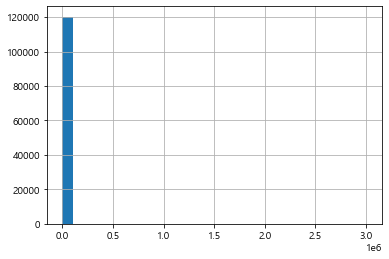

In [18]:
data.monthlyincome.hist(bins=30)
# plt.xlim(0, 50000)
plt.show()

In [19]:
# monthly income 의 결측치 중앙값으로 대체
data.monthlyincome.fillna(data.monthlyincome.median(), inplace=True)

### numberofdependents

In [20]:
data.numberofdependents.value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: numberofdependents, dtype: int64

In [21]:
data.numberofdependents.value_counts()/len(data)

0.0     0.579347
1.0     0.175440
2.0     0.130147
3.0     0.063220
4.0     0.019080
5.0     0.004973
6.0     0.001053
7.0     0.000340
8.0     0.000160
10.0    0.000033
9.0     0.000033
20.0    0.000007
13.0    0.000007
Name: numberofdependents, dtype: float64

In [22]:
# 최빈값이 0인데 비율이 58% 정도 됨. 결측치 최빈값인 0 으로 대체
data.numberofdependents.fillna(0, inplace=True)

In [23]:
data.isna().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime30-59dayspastduenotworse    0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime60-89dayspastduenotworse    0
numberofdependents                      0
dtype: int64

## 이상치 확인 및 처리

### IQR 기반 이상치 검출
- IQR : 3분위수-1분위수
- 이상치 기준 (rate는 일반적으로 1.5사용)
    - 극단적으로 작은 값 범위
         - 1분위수 - IQR*rate 보다 작은수
    - 극단적으로 큰 값 범위
        - 3분위 + IQR*rate 보다 큰수

In [24]:
def get_outlier(data, rate=1.5):
    """
    IQR 기반으로 Outlier 값 조회 메소드
    [Parameter]
        data: array-like -Outlier 계산할 데이터
        rate: IQR에 몇배를 극단치 계산에 사용할 지 비율
    [Return]
        bool type ndarray: 각 원소별 outlier 여부
    """
    q1 = np.quantile(data, q=0.25)
    q3 = np.quantile(data, q=0.75)
    IQR = q3 - q1
    return (data < q1 - IQR*rate) | (data > q3 + IQR*rate)

## 각 컬럼별 이상치 처리

### revolvingutilizationofunsecuredlines
- 전체 운용가능한 돈 대비 현재 운용가능한 돈의 비율 (남은신용한도+통장잔고/ 총신용한도+통장잔고)
- 1초과하는 값들을 1로 변경한다.

In [25]:
#확인
print(data['revolvingutilizationofunsecuredlines'].describe())
print('1이상값 개수',(data['revolvingutilizationofunsecuredlines'] > 1).sum())

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: revolvingutilizationofunsecuredlines, dtype: float64
1이상값 개수 3321


In [26]:
data.loc[data['revolvingutilizationofunsecuredlines']>1, 'revolvingutilizationofunsecuredlines'] = 1

In [27]:
#확인
print(data['revolvingutilizationofunsecuredlines'].describe())
print('1이상값 총개수', (data['revolvingutilizationofunsecuredlines'] > 1).sum())

count    150000.000000
mean          0.319196
std           0.349481
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max           1.000000
Name: revolvingutilizationofunsecuredlines, dtype: float64
1이상값 총개수 0


### age
- 대출자 나이
- 최소값이 0, 최대값 109
- 중위수로 변환 

In [28]:
data['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [29]:
# 0이 한명, 그다음은 21부터 존재 한다. 
data['age'].value_counts().sort_index()

0        1
21     183
22     434
23     641
24     816
      ... 
102      3
103      3
105      1
107      1
109      2
Name: age, Length: 86, dtype: int64

In [30]:
data.loc[data['age']==0]

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [31]:
data.loc[data['age']==0, 'age'] = data['age'].median()

In [32]:
data['age'].describe()

count    150000.000000
mean         52.295553
std          14.771249
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

### numberoftime30-59dayspastduenotworse
- 30 ~ 59 간 연체한 횟수
- 96, 98 이상치 존재 
    - 98의 개수가 264개로 어느정도 양이 되므로 유지

In [33]:
data['numberoftime30-59dayspastduenotworse'].describe()

count    150000.000000
mean          0.421033
std           4.192781
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: numberoftime30-59dayspastduenotworse, dtype: float64

In [34]:
data['numberoftime30-59dayspastduenotworse'].value_counts().sort_index()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: numberoftime30-59dayspastduenotworse, dtype: int64

In [35]:
# TODO: GUIDE삭제
# data.drop(data.loc[data['numberoftime30-59dayspastduenotworse']>90].index, inplace=True)

### debtratio 
- 소득 대비 부채비율(대출상환금+생활비/소득)
- 이상치가 아닌 값들 중 최대값으로 대체한다. 

In [36]:
get_outlier(data['debtratio']).sum()

31311

In [37]:
get_outlier(data['debtratio']).mean() # 약 20% 정도의 outlier

0.20874

In [38]:
data['debtratio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: debtratio, dtype: float64

In [39]:
np.quantile(data.debtratio, q=0.9)

1267.0

In [40]:
# outlier 아닌 값들 중 최대값으로 대체
# ~ : not
max_value_debt = np.max(data.debtratio[~get_outlier(data['debtratio'])]) # 최대값 조회
data.loc[data['debtratio'] > max_value_debt, 'debtratio'] = max_value_debt

In [41]:
max_value_debt

1.906764531

In [42]:
get_outlier(data['debtratio']).sum()

0

## monthlyincome
- 월간 소득
- 이상치를 이상치 아닌 값들의 최대 값으로 대체한다.

In [43]:
get_outlier(data['monthlyincome']).sum()

9149

In [44]:
data.monthlyincome.describe()
# max: 3,000,000 

count    1.500000e+05
mean     6.418455e+03
std      1.289040e+04
min      0.000000e+00
25%      3.903000e+03
50%      5.400000e+03
75%      7.400000e+03
max      3.008750e+06
Name: monthlyincome, dtype: float64

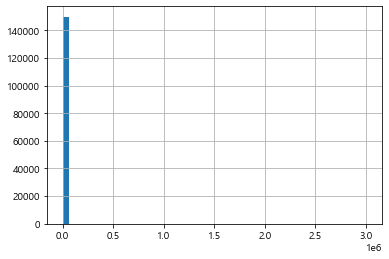

In [45]:
data.monthlyincome.hist(bins=50)
plt.show()

In [46]:
max_value_income = np.max(data.monthlyincome[~get_outlier(data['monthlyincome'])])
# 정상값의 최대값으로 변환
data.loc[data['monthlyincome'] >= max_value_income, 'monthlyincome'] = max_value_income

In [47]:
max_value_income

12645.0

In [48]:
get_outlier(data['monthlyincome']).sum()

0

# 전처리한 data파일 저장

In [49]:
data.to_csv('data/data-v01.csv', index=False) # version 별로 저장